<a href="https://colab.research.google.com/github/mjvakili/MLcourse/blob/master/day3/Lenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
import tensorflow as tf

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train=x_train.reshape(60000, 28, 28, 1)
x_train=x_train / 255.0
x_test = x_test.reshape(10000, 28, 28, 1)

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.AveragePooling2D(pool_size = (2, 2), strides = (2,2)),
    tf.keras.layers.Conv2D(16, (5,5), activation='relu'),
    tf.keras.layers.AveragePooling2D(pool_size = (2,2), strides = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),

])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [8]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size = 32, epochs = 5, verbose = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 29s 484us/sample - loss: 0.0294 - acc: 0.9908 - val_loss: 9.3676 - val_acc: 0.9831
Epoch 2/5
60000/60000 [==============================] - 28s 466us/sample - loss: 0.0253 - acc: 0.9918 - val_loss: 6.3694 - val_acc: 0.9879
Epoch 3/5
60000/60000 [==============================] - 28s 474us/sample - loss: 0.0225 - acc: 0.9930 - val_loss: 6.8421 - val_acc: 0.9871
Epoch 4/5
60000/60000 [==============================] - 28s 466us/sample - loss: 0.0201 - acc: 0.9939 - val_loss: 7.0223 - val_acc: 0.9898
Epoch 5/5
60000/60000 [==============================] - 29s 477us/sample - loss: 0.0165 - acc: 0.9947 - val_loss: 8.4099 - val_acc: 0.9887


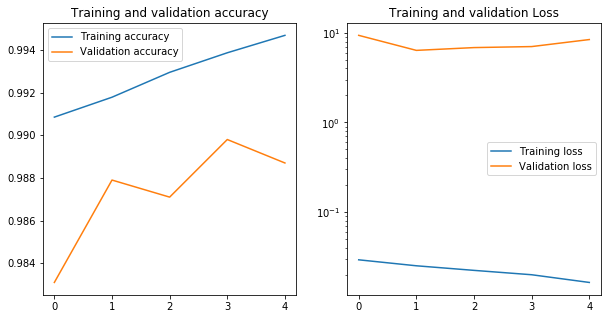

In [12]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

ax[0].plot(epochs, acc, label='Training accuracy')
ax[0].plot(epochs, val_acc, label='Validation accuracy')
ax[0].set_title('Training and validation accuracy')
ax[0].legend(loc=0)

ax[1].semilogy(epochs, loss, label='Training loss')
ax[1].semilogy(epochs, val_loss, label='Validation loss')
ax[1].set_title('Training and validation Loss')
ax[1].legend(loc=0)

plt.show()

In [0]:
ypred = model.predict(x_test)

In [0]:
# the best estimate of the classifier
import numpy as np
y_best = []
for k in range(len(ypred)):
  y_best.append(np.argmax(ypred[k]))
y_best = np.array(y_best)  

In [0]:
seven_index = np.where(y_test == 6)
x_seven, y_seven, yhat_seven = x_test[seven_index], y_test[seven_index], y_best[seven_index]

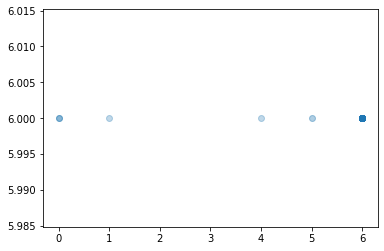

In [23]:
plt.scatter(yhat_seven , y_seven, alpha = .1)

In [0]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows = 5)
first=0
second=7
third= 9
filter_number = 3
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(x_test[first].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, filter_number], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(x_test[second].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :,  filter_number], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(x_test[third].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :,  filter_number], cmap='inferno')
  axarr[2,x].grid(False)